In [1]:
pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 618.1 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.7-cp312-cp312-linux_x86_64.whl size=301994 sha256=cb5d136c717a3ebb5bea7d5dd5cd79fcd4a1b4b8fc29f0a67b6000a10836d98a
  Stored in directory: /tmp/pip-ephem-wheel-cache-45kg7sjk/wheels/d8/b7/b5/bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# <a id="index">Table of Contents:</a> 
* [About S&P 500](#about)
* [Data Pre-processing](#prep)
    * [About the dataset](#datainfo)
    * [Importing Libraries & Modules](#lib) 
    * [Handling Missing Values](#null)
    * [Checking Categorical Values](#cat)
* [Data Analysis & Visualization](#visual)
    * [Overview visualization](#overview)
    * [Correlation Matrix](#corr)
    * [Distribution Analysis](#dist)
    * [Questions to ask](#ques)

# 1. <a id="about">About S&P 500</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
---
![S&P's 500](https://abovethegreenline.com/wp-content/uploads/2020/08/sP.jpg)

<font size="3">``The S&P 500 is a stock market index that tracks the largest 500 publicly traded U.S. companies. Investors have long used the S&P 500 as a benchmark for their investments as it tends to signal overall market health. The S&P 500 is a “free-floating index” meaning that it only takes into consideration the health and price of shares that are publicly traded; it does not consider government-owned or privately-owned shares. The index is a popular choice for long-term investors who wish to watch growth over the coming decades.``<font size>

# 2. <a id="prep">Data Overview & Pre-processing</a>
-----
<font size="3">``In this section, we'll be working on to understand our dataset and later cleaning it before processing it further.``<font size>

## 2.1. <a id="lib">Importing Libraries and Modules</a> 

In [4]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# stocks related missing info
import yfinance as yf

# ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

## 2.2. <a id="datainfo">About the dataset: Overview of Companies under S&P 500</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [5]:
SP500_Comp = pd.read_csv('sp500_companies.csv')
SP500_Comp.head(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.01,3355858698240,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.062950
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,136.05,3337306505216,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.062602
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,408.46,3036850946048,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.056966
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,170.68,2080281853952,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039022
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,169.24,2079096569856,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.039000


### Let's start by defining the columns

| Column no | Features | Description |
|:---|:---|:---|
| 0 | Exchange | An open, organized marketplace where stocks, bonds, commodities, options and futures are traded |
| 1 | Symbol | "Ticker". Unique code given to a company listed on the exchange |
| 2 | Shortname | Company's short name |
| 3 | Longname | Company's long name |
| 4 | Sector | Sector of the Company|
| 5 | Industry | Industry of the Company |
| 6 | Currentprice | Most recent selling price of a stock |
| 7 | Marketcap | Market value of the company's outstanding shares. Calculated using $Current\:Price \times Outstanding\:shares$ |
| 8 | Ebitda | It’s a profitability calculation that measures how profitable a company is before paying interest to creditors, taxes to the government, and taking paper expenses like depreciation and amortization. It is calculated as $EBITDA\: = Net\:Income + Interest + Taxes + Depreciation + Amortization$ |
| 9 | Revenuegrowth | Increase (or decrease) in a company’s sales from one period to the next. It is calculated as $\dfrac {Current\:Period\:Sales - Prior\:Period\:Sales}{Prior\:Period\:Sales}$ |
| 10 | City | City of the Company's HQ |
| 11 | State | State of the Company's HQ |
| 12 | Country | Company's country of origin |
| 13 | Fulltimeemployees | Total full time employees in the company |
| 14 | Longbusinesssummary | Summary about the company's business |
| 15 | Weight | S&P 500 uses marketcap weighing method, where weight of each stock is calculated as $\dfrac{Company\:marker\:cap}{Total\:of\:all\:market\:cap}$ |

#### Now that we have defined the features of the S&P 500 COMPANIES dataframe, let's analyze the dataset further!

In [6]:
def basic_info(df):
    """
    Get basic information about the dataset including shape, datatypes, statistics, null values and duplicated values.
    """
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    
basic_info(SP500_Comp)

Shape of this dataset is (503, 16).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weig

#### *Observations:*
- The shape of this dataframe is (493, 16) i.e., 493 records or observations with 16 features
- Columns with null (missing) values
       - Ebitda: 30
       - Revenurgrowth: 1
       - State: 19
       - Fulltimeemplyees: 2
- There doesn't seem to be a column where the datatype needs to be modified.

## 2.3 <a id="null">Handling Missing Values (these techniques won't work for Time Series)</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
 Understand your data, know what is important for your business problem and always question how these modifications done to the missing values are affecting your dataset.
 Check this article [Dropping Missing Values? You Probably Shouldn’t.
](https://towardsdatascience.com/few-reasons-to-not-drop-missing-values-575a8d2b6a41) by Somraj Saha before handling the missing information. Our main goal should be to provide meaning to the missing data; as said by the author. Also it is advisable to talk to domain experts if possible, to figure out the reason for the missing values before following any techniques blindly.
<br><br> **TECHNIQUES:**
- **DROPPING THE MISSING VALUES**: 
    <br>This is the easiest option out there to deal with missing values, but dropping the rows or columns with missing values should be the last resort. This technique is recommended only if you have enough relevant samples and features to work with it. Otherwise, you might end up losing important information which can lower the accuracy of your model.
- **STATISTICAL IMPUTATION**:
    <br> Basically replacing the numerical values with the mean, median & categorial values with mode (can create bias). This can be achieved by simply using pandas or sklearn's SimpleImputer.
    <br> *NOTE: Missing values can also be replaced with 0 (make sure you understand how this affects your dataset since replacing with 0 won't work for some cases as they can introduce bias)*
- **PREDICT THEM**:
    <br> Missing values can be predicted using the other available features or columns.
- **LEAVE THEM AS THEY ARE**:
    <br> It may sound a bit suprising, but there are few algorithms that supports missing values. Just make sure that the algorithm aligns with your problem statement.


#### Missing States
Since I am going to be performing an EDA, where I am not going to be using the "States" column. Rather I'll be relying on 'Country' column instead. So it is useless for me to fill it up now, hence I'm dropping the entire 'State' column.

In [7]:
SP500_Comp[SP500_Comp['State'].isnull()].head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
33,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,458.32,218232750080,1.258100e+10,0.025,Woking,NaN,United Kingdom,65596.0,Linde plc operates as an industrial gas compan...,0.004094
34,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,343.90,214887972864,1.106591e+10,0.026,Dublin,NaN,Ireland,774000.0,Accenture plc provides strategy and consulting...,0.004031
72,NYQ,ETN,"Eaton Corporation, PLC",Eaton Corporation plc,Industrials,Specialty Industrial Machinery,331.13,130862579712,5.457000e+09,0.079,Dublin,NaN,Ireland,94000.0,Eaton Corporation plc operates as a power mana...,0.002455


In [8]:
SP500_Comp = SP500_Comp.drop(['State'], axis=1)
SP500_Comp.head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.01,3355858698240,1.346610e+11,0.061,Cupertino,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.062950
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,136.05,3337306505216,6.118400e+10,1.224,Santa Clara,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.062602
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,408.46,3036850946048,1.365520e+11,0.160,Redmond,United States,228000.0,Microsoft Corporation develops and supports so...,0.056966


#### Missing Revenue Growth

In [9]:
SP500_Comp[SP500_Comp['Revenuegrowth'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
54,NYQ,VZ,Verizon Communications Inc.,Verizon Communications Inc.,Communication Services,Telecom Services,41.06,172847415296,4.873500e+10,NaN,New York,United States,101200.0,"Verizon Communications Inc., through its subsi...",0.003242
98,NYQ,AMT,American Tower Corporation (REI,American Tower Corporation,Real Estate,REIT - Specialty,212.11,99116670976,6.975900e+09,NaN,Boston,United States,5643.0,"American Tower, one of the largest global REIT...",0.001859
281,NMS,WTW,Willis Towers Watson Public Lim,Willis Towers Watson Public Limited Company,Financial Services,Insurance Brokers,302.82,30501545984,NaN,NaN,London,United Kingdom,48000.0,Willis Towers Watson Public Limited Company op...,0.000572
345,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,65.22,22547077120,2.134000e+09,NaN,San Jose,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000423


- We need to figure out the importance of this stock before deleting it, since revenue growth can't just be calculated using other features.
- The weight of this stock - CVS Health Corporation (CVS) in S&P 500 is **0.0035891** and has the Marketcap of **\$124164841472**.
- This dataset is already sorted by it's weight in the S&P 500, hence this stock belongs in the top 55 stocks in S&P 500. So the best choice is to replace it using the correct Revenue growth.


We can use Yahoo Finance to extract missing information, it'll be good to create a general function that automatically replaces the null values in these columns.
- [Official Documentation of yfinance module](https://pypi.org/project/yfinance/)
- [yfinance Library – A Complete Guide](https://algotrading101.com/learn/yfinance-guide/) by Greg Bland

In [10]:
def replace_null(df, sym, col, missing):
    ticker = yf.Ticker(sym)
    df.loc[df['Symbol']==sym, col]= ticker.info[missing]

In [11]:
replace_null(SP500_Comp,'CVS', 'Revenuegrowth', 'revenueGrowth')

In [12]:
SP500_Comp[SP500_Comp['Symbol'] == 'CVS']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
145,NYQ,CVS,CVS Health Corporation,CVS Health Corporation,Healthcare,Healthcare Plans,54.65,68748607488,1.610000e+10,0.025,Woonsocket,United States,219000.0,CVS Health Corporation provides health solutio...,0.00129


As you can see, the quarterly revenue growth is easily replaced with the correct one.

#### Missing Fulltimeemployees

In [13]:
SP500_Comp[SP500_Comp['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
13,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,291.85,566682255360,2.514800e+10,0.117,San Francisco,United States,NaN,Visa Inc. operates as a payment technology com...,0.010630
94,NMS,SBUX,Starbucks Corporation,Starbucks Corporation,Consumer Cyclical,Restaurants,97.03,109983506432,6.700000e+09,-0.032,Seattle,United States,NaN,"Starbucks Corporation, together with its subsi...",0.002063
175,NYQ,DHI,"D.R. Horton, Inc.","D.R. Horton, Inc.",Consumer Cyclical,Residential Construction,170.74,55324372992,6.202900e+09,-0.048,Arlington,United States,NaN,"D.R. Horton, Inc. operates as a homebuilding c...",0.001038
260,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,243.61,35760971776,1.632186e+09,0.111,San Diego,United States,NaN,"ResMed Inc. develops, manufactures, distribute...",0.000671
287,NYQ,RJF,"Raymond James Financial, Inc.","Raymond James Financial, Inc.",Financial Services,Asset Management,145.35,29549656064,NaN,0.132,Saint Petersburg,United States,NaN,"Raymond James Financial, Inc., a diversified f...",0.000554
424,NMS,SMCI,"Super Micro Computer, Inc.","Super Micro Computer, Inc.",Technology,Computer Hardware,26.03,15242257408,1.304591e+09,1.430,San Jose,United States,NaN,"Super Micro Computer, Inc., together with its ...",0.000286
448,NMS,FFIV,"F5, Inc.","F5, Inc.",Technology,Software - Infrastructure,231.20,13431332864,7.820980e+08,0.056,Seattle,United States,NaN,"F5, Inc. provides multi-cloud application secu...",0.000252
452,NYQ,SOLV,Solventum Corporation,Solventum Corporation,Healthcare,Health Information Services,72.17,12464552960,2.086000e+09,0.002,Saint Paul,United States,NaN,"Solventum Corporation, a healthcare company, e...",0.000234
501,NYQ,AMTM,"Amentum Holdings, Inc.","Amentum Holdings, Inc.",Industrials,Specialty Business Services,29.63,7209037824,4.330000e+08,-0.031,Chantilly,United States,NaN,"Amentum Holdings, Inc. provides engineering an...",0.000135


This looks like a case of MCAR (Missing Completely At Random). The missing values have no relationship with other observed or unobserved data. We can impute with mean or mode of the column. 
<br><br>
Unfortunately, I couldn't find any info about the Fulltimeemployees, instead I found these information:
- Found out that Metlife has 55k+ employees on LinkedIn including the part time roles. It shows the company size to be 10k+.
- The company size of Citrix Systems is around 5k to 10k and total employees including the part timers are 10,380 on LinkedIn.
So, filling the Eulltimeemployees of these companies with the mean which is 5.540794e+04 (around **55408**) would be overestimating the number of fulltimers in these company. Therefore, I'll be replacing it with the mode of the column which is **14000** full time employees.

In [14]:
SP500_Comp.loc[SP500_Comp['Fulltimeemployees'].isnull(), 'Fulltimeemployees'] = SP500_Comp['Fulltimeemployees'].mode()[0]

In [15]:
SP500_Comp[SP500_Comp['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight


#### Missing EBITDA

In [16]:
SP500_Comp[SP500_Comp['Ebitda'].isnull()].head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,219.78,618755457024,NaN,0.030,New York,United States,316043.0,JPMorgan Chase & Co. operates as a financial s...,0.011607
24,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,41.33,317120151552,NaN,-0.005,Charlotte,United States,213000.0,"Bank of America Corporation, through its subsi...",0.005949
36,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,63.70,212088504320,NaN,-0.018,San Francisco,United States,220167.0,"Wells Fargo & Company, a financial services co...",0.003978


Here, we can notice that the missing EBITDA are all from the Financial Services. But this doesn't mean the reverse is true i.e., All companies in Financial Services do not have missing EBITDA.
<br> Now lets count the no of missing values in each sector.

In [18]:
missing_EBITDA = SP500_Comp[SP500_Comp['Ebitda'].isnull()]
count_EBITDA = missing_EBITDA.groupby(['Sector', 'Industry'])['Industry'].count()
count_EBITDA

Sector              Industry                       
Financial Services  Asset Management                   6
                    Banks - Diversified                5
                    Banks - Regional                   9
                    Capital Markets                    3
                    Credit Services                    4
                    Insurance - Property & Casualty    1
                    Insurance - Reinsurance            1
                    Insurance Brokers                  1
Name: Industry, dtype: int64

In [19]:
Financial_companies = SP500_Comp[SP500_Comp['Sector']=='Financial Services']
count_fc = Financial_companies.groupby(['Sector', 'Industry'])['Industry'].count()
count_fc

Sector              Industry                        
Financial Services  Asset Management                    11
                    Banks - Diversified                  5
                    Banks - Regional                     9
                    Capital Markets                      4
                    Credit Services                      7
                    Financial Data & Stock Exchanges     8
                    Insurance - Diversified              3
                    Insurance - Life                     4
                    Insurance - Property & Casualty      9
                    Insurance - Reinsurance              1
                    Insurance Brokers                    6
Name: Industry, dtype: int64

We can notice here that all the companies belonging to 'Banks—Diversified', 'Banks—Regional' and 'Insurance—Reinsurance' industries don't have EBITDA data. While some companies from 'Asset Management', 'Capital Markets' and 'Credit Services' industries have missing EBITDA.

## 2.4. <a id="cat">Checking categorial categories</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [20]:
for col in SP500_Comp.columns:
    b = SP500_Comp[col].unique()
    if len(b)<20:
        print(f'{col} has {len(b)} unique values -->> {b}', end = '\n\n')

Exchange has 4 unique values -->> ['NMS' 'NYQ' 'BTS' 'NGM']

Sector has 11 unique values -->> ['Technology' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Healthcare' 'Consumer Defensive' 'Energy'
 'Basic Materials' 'Industrials' 'Utilities' 'Real Estate']

Country has 8 unique values -->> ['United States' 'United Kingdom' 'Ireland' 'Switzerland' 'Netherlands'
 'Canada' 'Bermuda' 'Singapore']



# 3. <a id="visual">DATA ANALYSIS & VISUALIZATION</a>  <font size='3'>[[Table of contents🔝]](#index)]<font size>
-------
<font size="3">``In this section, we'll be questioning our data, find patterns & insights through them.``<font size>

## 3.1. <a id="overview">Overview visualization of the dataset</a>

<Figure size 1500x1200 with 0 Axes>

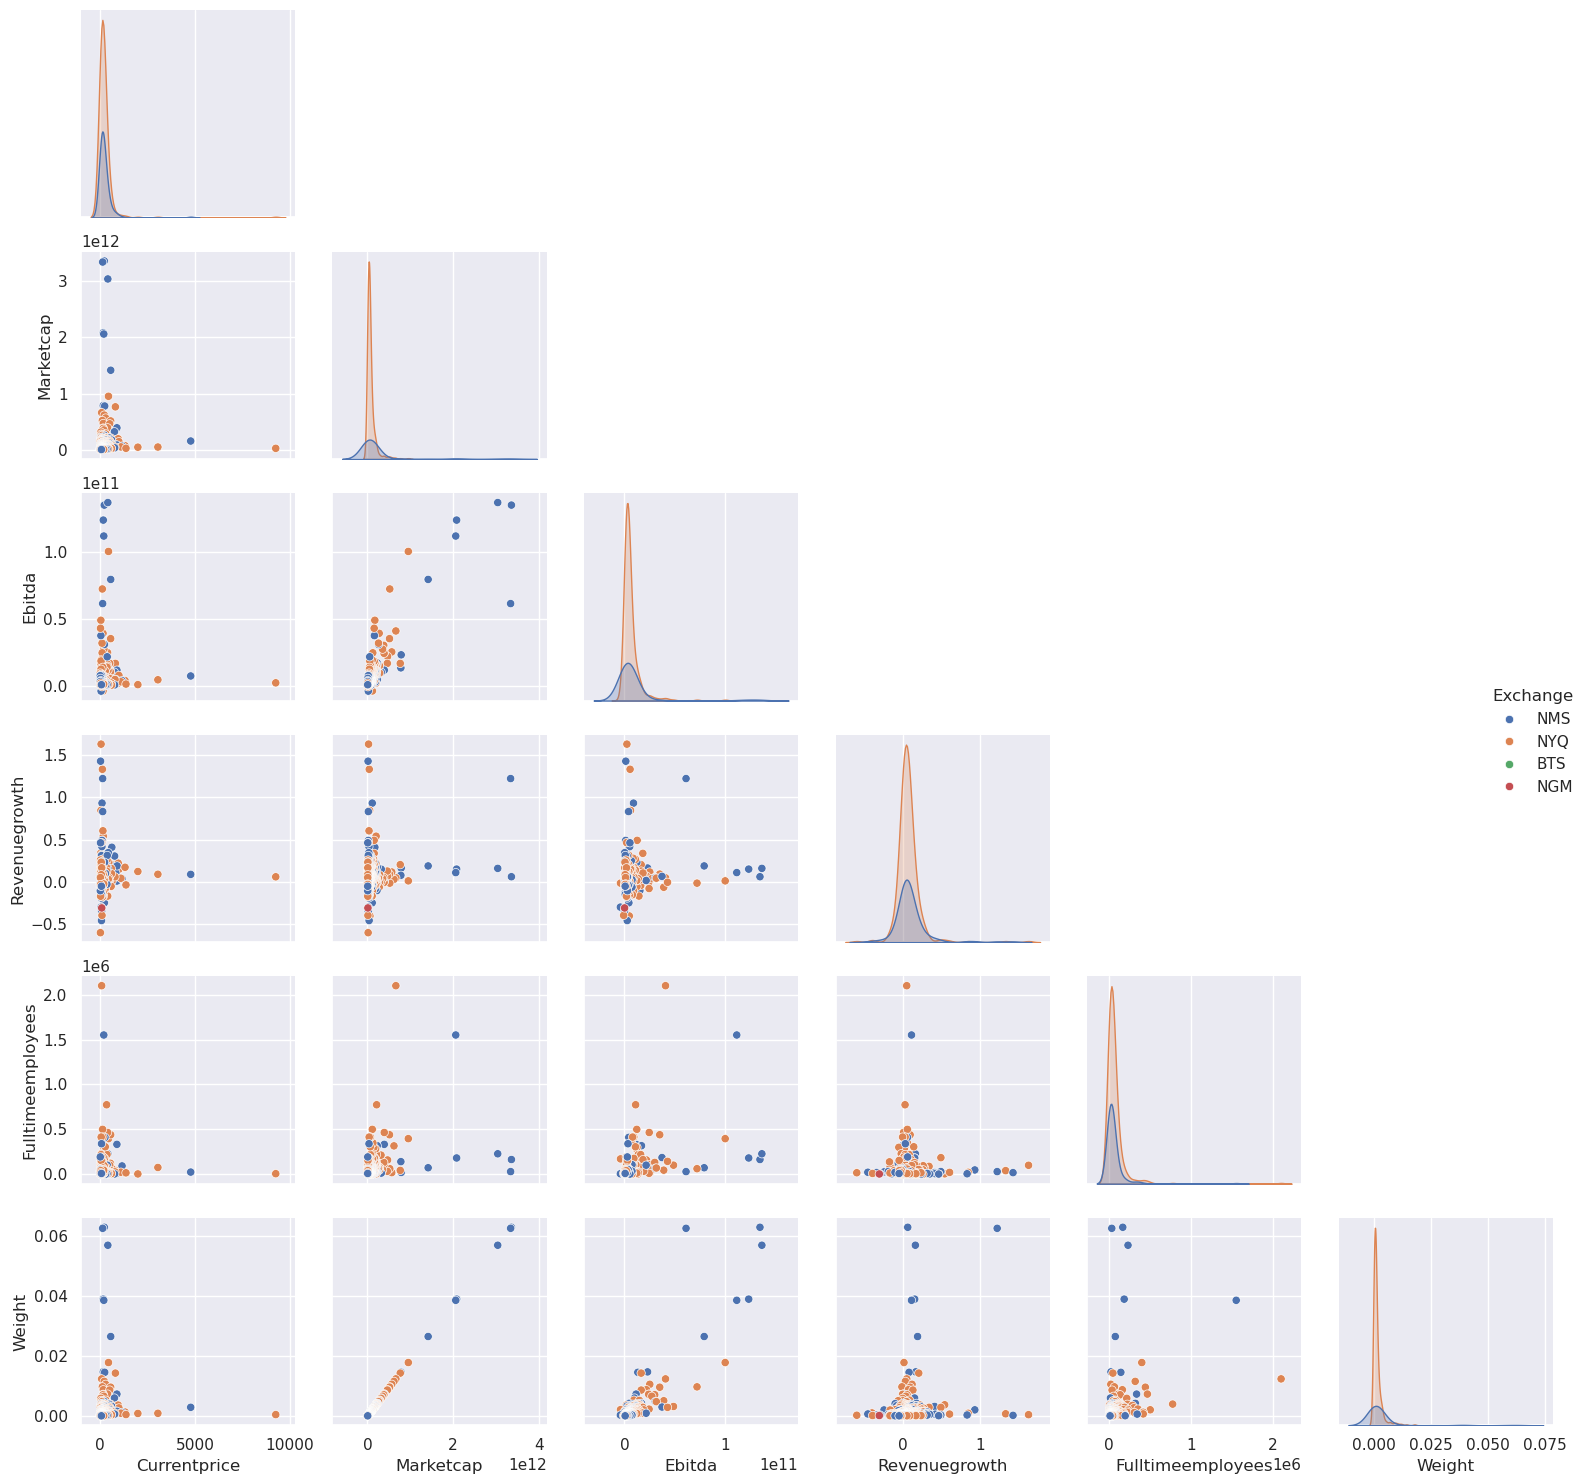

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,12))
sns.pairplot(SP500_Comp, corner=True, hue='Exchange')
plt.tight_layout()

#### *Observations*
- We can see a linear relationship between Marketcap and Weights (calculated from Marketcap).
- The distributions of these columns are mostly positively skewed, we'll get into the details of the distributions a bit later.


## 3.2. <a id="corr">Correlation Heatmap</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
> Correlation of any 2 variables quantifies the **linear** relationship between them. If 2 variables have low correlation with each other, that does not mean that they are independent of each other. They could influence each other, but it won't be linearly. They probably have non linear relationship with each other.

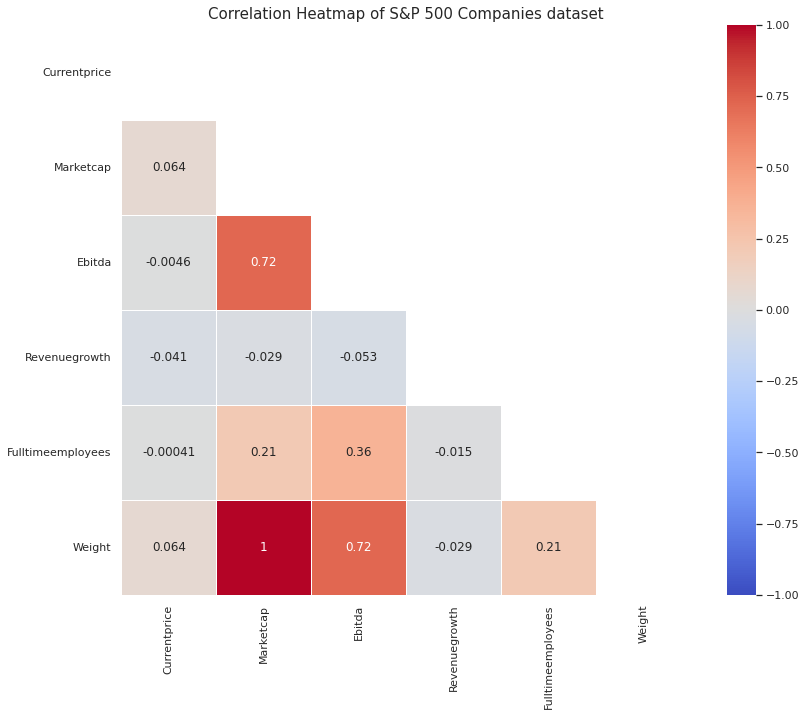

In [20]:
SP_corr = SP500_Comp.corr()
mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of S&P 500 Companies dataset', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

##### *Observations:*
- As we can see, there's a high positive correlation = 1, between Marketcap & Weight, which has a very obvious reason, i.e., weights in S&P 500 are calculated using Marketcap. Formula: $weights = \dfrac{Company\:marker\:cap}{Total\:of\:all\:market\:cap}$ 
- EBITDA also shows a strong correlation with Weights as well, that is companies with higher weights, tend to show high EBITDA.
- Other features have weak positive or negative relationship with each other.

## 3.3. <a id="dist">Distribution Analysis</a> <font size='3'> [[Table of contents🔝]](#index)]<font size>

### 3.3.1. Distribution of Exchange column

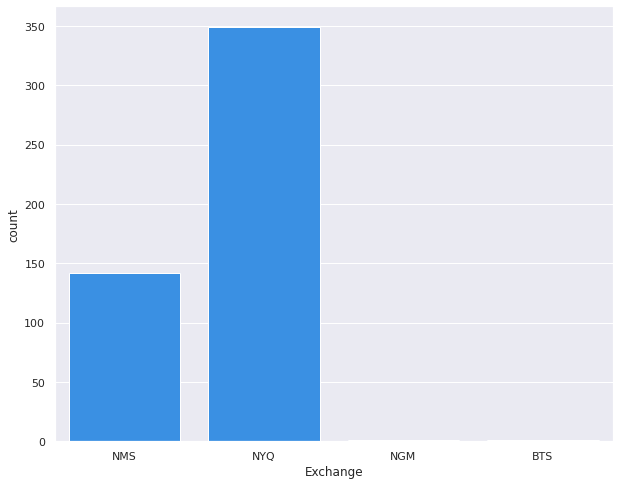

In [21]:
plt.figure(figsize=(10,8))
d0 = sns.countplot(data=SP500_Comp, x='Exchange', color='dodgerblue') 

#### *Observations*:
- Stocks in S&P 500 are exchaged the most at NYQ.

### 3.3.2. Distribution of Revenue Growth

(-0.7, 3.0)

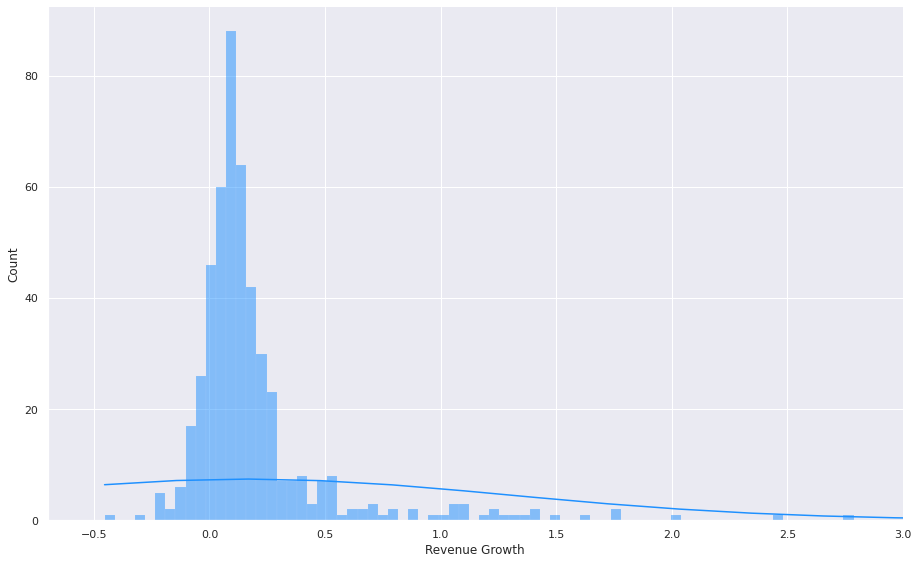

In [22]:
d1 = sns.displot(data=SP500_Comp, x='Revenuegrowth', height=8, aspect=1.6, kde=True, color='dodgerblue')
d1.set(xlabel='Revenue Growth')
plt.xlim(-0.7,3)

#### *Observations*
- This is a positively skewed distribution.
- There were some outliers, along the values 5.0, hence the graph was scaled down.
- We can see that most of the companies' revenue growth is around 0.2.
- There are some negative revenue growth which show there is decline in few companies's sales or earnings, or a decrease in an economy's GDP during any quarter.

### 3.3.3. Distribution of Current Price

(0.0, 2100.0)

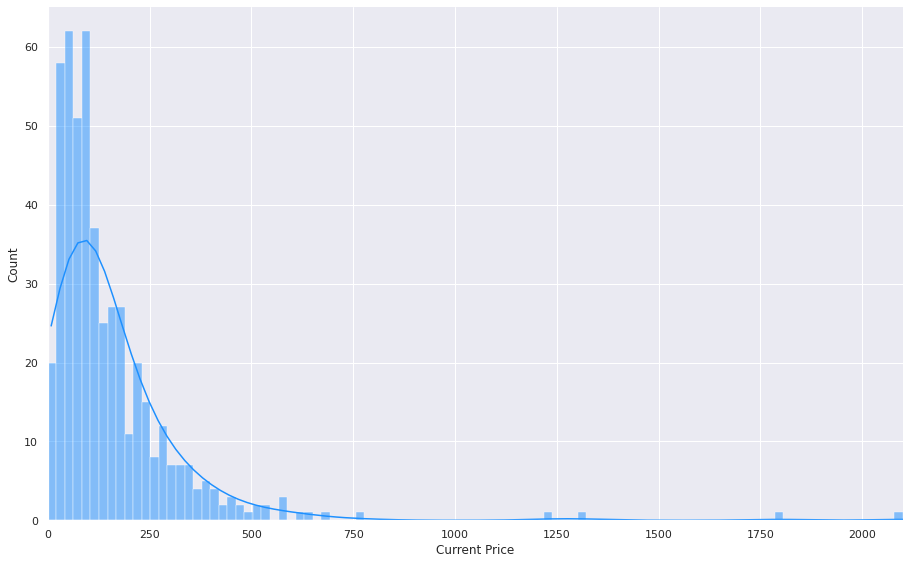

In [23]:
d2 = sns.displot(data=SP500_Comp, x='Currentprice', kde=True, height=8, aspect=1.6, bins=100, binrange=(0, 2100), color='dodgerblue')
d2.set(xlabel='Current Price')
plt.xlim(0, 2100)

#### *Observations*
- The distribution of Current Price is skewed right that means, the vast majority of stocks in S&P 500 have low current price as compared to few minority stocks aka outliers seen on the right side of the plot.
- Also, there are seem to be 2 distinct groups that has the highest count of Current Price, which seems to be between 50-150.

In [24]:
print(f'The mode of the Current Price column is {SP500_Comp.Currentprice.mode()[0]}.')

The mode of the Current Price column is 24.3.


### 3.3.4. Distribution of Full Time Employees

(0.0, 300000.0)

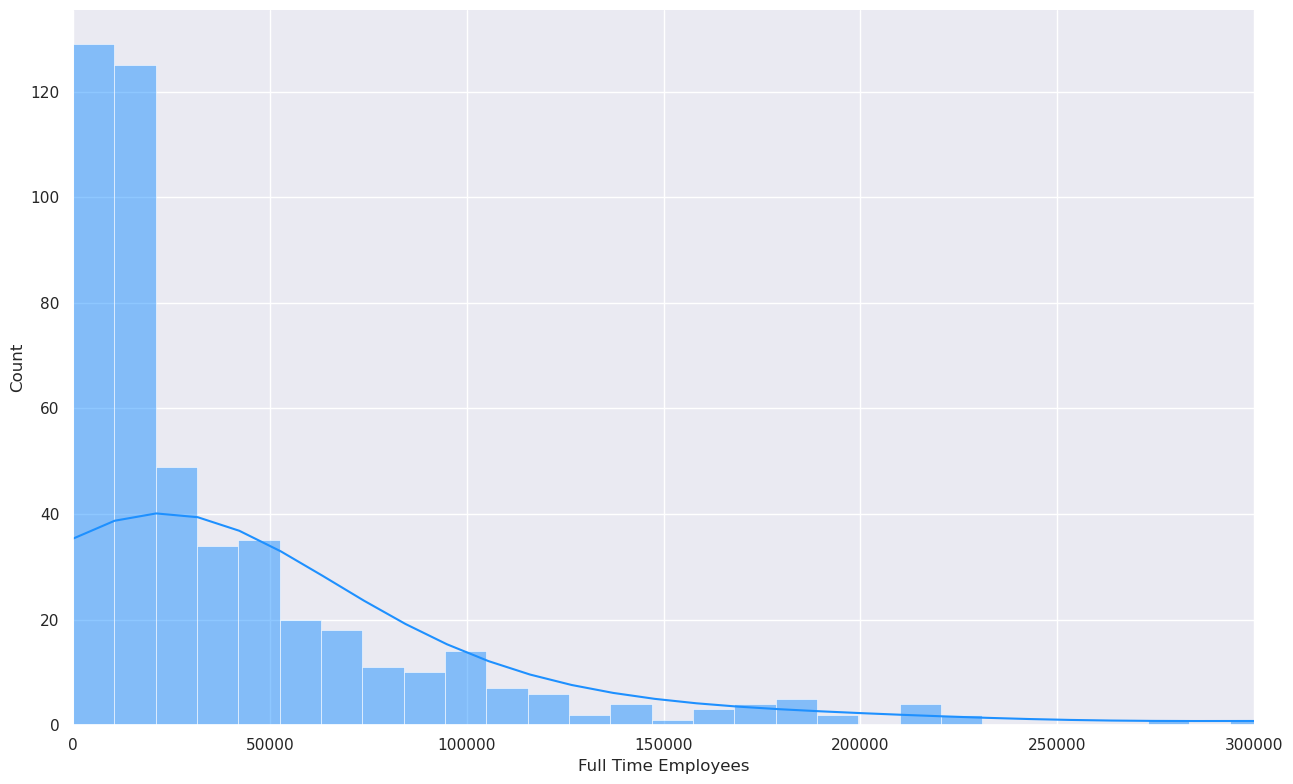

In [23]:
d3 = sns.displot(data=SP500_Comp, x='Fulltimeemployees', height=8, aspect=1.6, bins=200, kde=True, color='dodgerblue')
d3.set(xlabel='Full Time Employees')
plt.xlim(0, 0.3*1e6)

#### *Observations*
- The distribution of Current Price is skewed right that means, the vast majority of stocks in S&P 500 have around 0 to 20000 FT Employees as compared to few minority stocks aka outliers seen on the right side of the plot.

In [24]:
print(f'The mode of the Fulltimeemployees column is {SP500_Comp.Fulltimeemployees.mode()[0]}.')

The mode of the Fulltimeemployees column is 18000.0.



# 3.4. <a id="ques">Questions to Ask</a> <font size='3'> [[Table of contents🔝]](#index)]<font size>

### Q - Which is the leading sector in S&P 500? 
The code below is referred from the notebook [Which stocks should I invest in?](https://www.kaggle.com/code/dhimananubhav/which-stocks-should-i-invest-in) by Anubhav Dhiman.

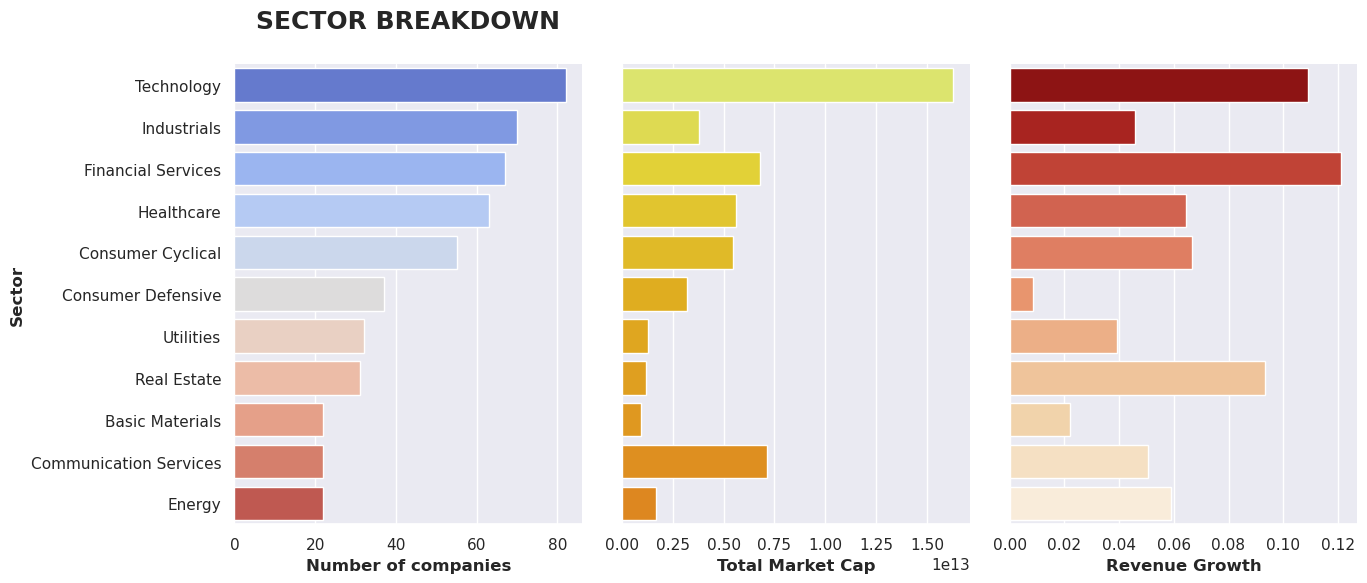

In [25]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = SP500_Comp.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

#### *Observations:*
- In S&P 500, stocks in Technology Sector and the total Market Cap of this sector is the highest.
- On the other hand, Consumer Cyclical sector has the stocks with the most revenue growth.
- While the least amount of stocks belong to Energy sectors but has the 2nd highest revenue growth.

### Q: Where are most stocks tracked by S&P 500 exchanged at?

Text(0.5, 1.0, 'Exchange % in S&P 500 Index')

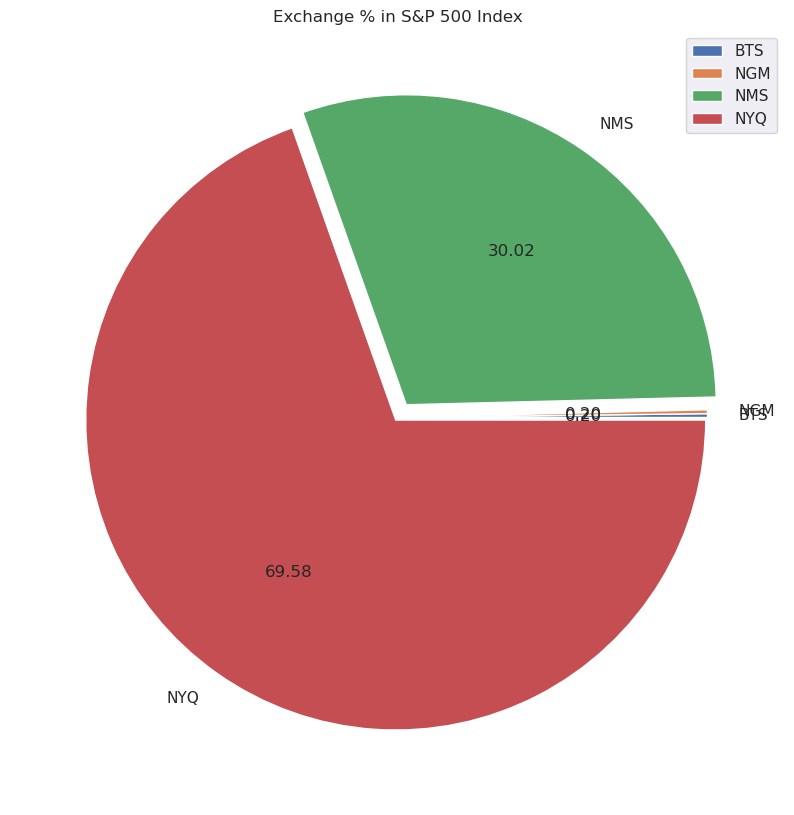

In [26]:
# storing count values
exchange_df = (SP500_Comp.groupby(["Exchange"]).size().reset_index(name="Counts").sort_values(by=["Exchange"]))
labels = exchange_df['Exchange'].unique()
values = exchange_df['Counts']

plt.figure(figsize=(10,12))
fig1 = plt.pie(x=values, labels=labels,explode=[0,0,0.05,0.01], autopct='%.2f')
plt.legend()
plt.title('Exchange % in S&P 500 Index')

#### *Observations:*
- Most of the stocks tracked by S&P 500 i.e., 70.79%, are exchanged at NYQ.
- 28.8% of them are exchanged at NMS.
- The rest of the 0.4% are exchanged at NGM (0.2%) & BTS (0.2%), which is exactly one stock each.

In [27]:
SP500_Comp[SP500_Comp['Exchange']=='BTS']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
350,BTS,CBOE,"Cboe Global Markets, Inc.","Cboe Global Markets, Inc.",Financial Services,Financial Data & Stock Exchanges,209.6,21942185984,1.290400e+09,0.162,Chicago,United States,1647.0,"Cboe Global Markets, Inc., through its subsidi...",0.000412


In [28]:
SP500_Comp[SP500_Comp['Exchange']=='NGM']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
463,NGM,ENPH,"Enphase Energy, Inc.","Enphase Energy, Inc.",Technology,Solar,87.46,11816459264,102900000.0,-0.309,Fremont,United States,3157.0,"Enphase Energy, Inc., together with its subsid...",0.000222


### Q: Top 10 Stock's Market Cap, EBIDTA & Full Time Employees Comparison

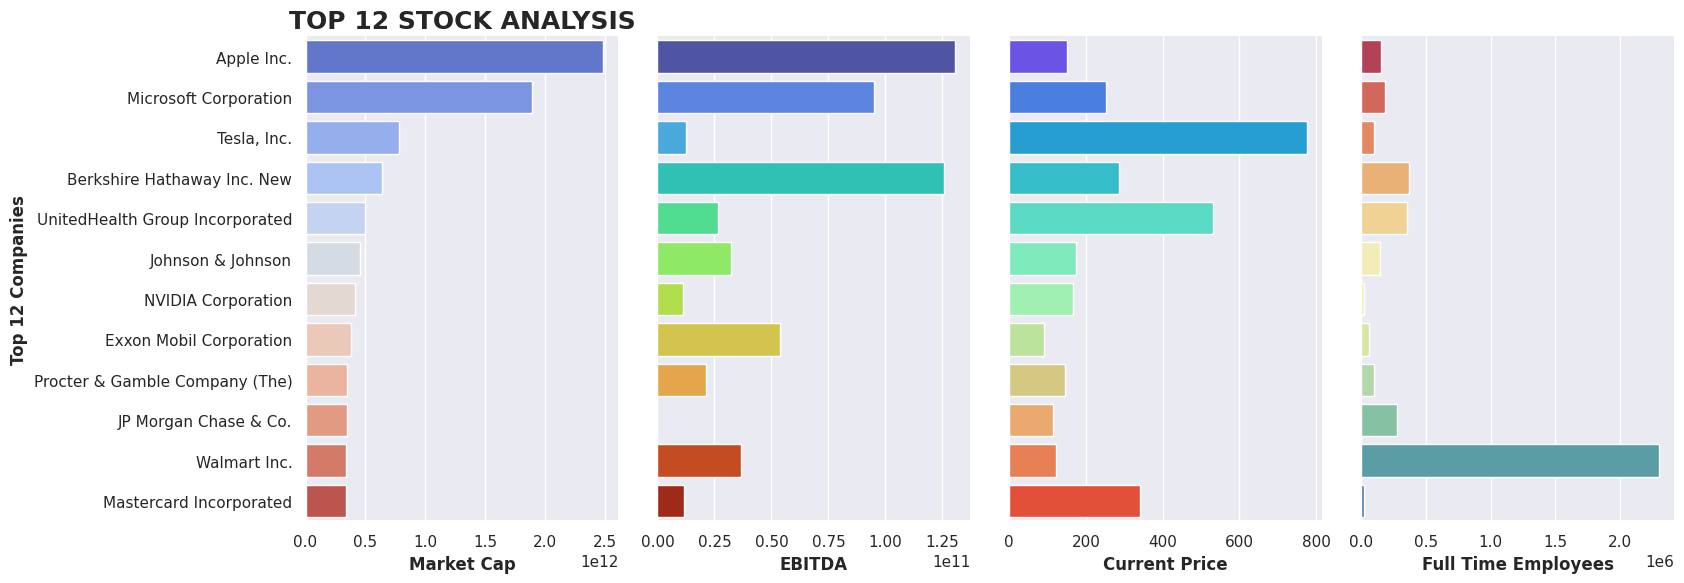

In [31]:
N = 12
fig2 = plt.figure(num=None, figsize=(17, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 4, 1)
ax1 = sns.barplot(x=SP500_Comp.iloc[:N,7], y=SP500_Comp.iloc[:N,2], data=SP500_Comp, palette=('coolwarm'))
ax1.set_xlabel('Market Cap', weight='bold')
ax1.set_ylabel(f'Top {N} Companies', weight = 'bold')
ax1.set_title(f'TOP {N} STOCK ANALYSIS', weight='bold').set_fontsize('18')

plt.subplot(1, 4, 2)
ax2 = sns.barplot(x=SP500_Comp.iloc[:N,8], y=SP500_Comp.iloc[:N,2], data=SP500_Comp, palette=('turbo'))
ax2.set_xlabel('EBITDA', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 3)
ax2 = sns.barplot(x=SP500_Comp.iloc[:N,6], y=SP500_Comp.iloc[:N,2], data=SP500_Comp, palette=('rainbow'))
ax2.set_xlabel('Current Price', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 4)
ax2 = sns.barplot(x=SP500_Comp.iloc[:N,12], y=SP500_Comp.iloc[:N,2], data=SP500_Comp, palette=('Spectral'))
ax2.set_xlabel('Full Time Employees', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

#### Observations
- Apple Inc is the stock with the highest Market Cap, hence gaining the highest weight in S&P 500 Index and occupying the 1st spot. A high EBITDA means the company, aka Apple Inc. has less operating expenses, and higher earnings, which shows that they will still have a decent amount of revenue left over after their paying operating costs.
- It's Current Price is on the average side in the S&P 500 Index (between 100-200).


<div class="alert alert-block alert-success">
    <b><font size = 4.5>Congratulations, you have made this far in the notebook!🤸🏻‍♀️ Thanks for checking this notebook. Do drop a comment or suggestions!⭐</b>
   <br> P.S. I thought Kitty & Corgi mode would be distracting, but they weren't. 
</div>

![THANKS](https://c.tenor.com/TbCttLmPT78AAAAM/anime-okay-then.gif)